## Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Шаг 1. Откройте файлы с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display,Math
import matplotlib.pyplot as plt

calls_df    = pd.read_csv('calls.csv')
internet_df = pd.read_csv('internet.csv')
messages_df = pd.read_csv('messages.csv')
tariffs_df  = pd.read_csv('tariffs.csv')
users_df    = pd.read_csv('users.csv')

calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [2]:
internet_df.info()
internet_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [3]:
messages_df.info()
messages_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [4]:
tariffs_df.info()
tariffs_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [5]:
users_df.info()
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Шаг 2. Подготовьте данные

Во всех таблицах, где присутствуют даты, преобразуем тип в соответствующих столбцах к datetime.

In [6]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')

#Проверка
calls_df.info()
print()
internet_df.info()
print()
messages_df.info()
print()
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), obje

Исследуем звонки продолжительностью 0 сек и узнаем потеряется ли какой-нибудь пользователь, если мы удалим данные записи.

In [7]:
print(len(calls_df.query('duration != 0.0')['user_id'].unique()))
#Никакой пользователь не потеряется, а значит избавимся от данных звонков
calls_df = calls_df.query('duration != 0.0')
calls_df.shape[0]

492


162994

Важной особенностью является тот факт, что не во всех таблицах присутствуют данные о 500 пользователях.

In [8]:
print(len(users_df['user_id'].unique()))
print(len(messages_df['user_id'].unique()))
print(len(internet_df['user_id'].unique()))
print(len(calls_df['user_id'].unique()))

500
426
497
492


Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам и объем израсходованного интернет-трафика по месяцам. 

Далее объединим полученные сводные таблицы в одну и добавим тариф каждого пользователя.

In [9]:
#Сводная таблица по звонкам
calls_df['month']     = calls_df['call_date'].dt.strftime('%B')
calls_per_mon         = calls_df.groupby(['user_id','month']).agg({'id':'count','duration':'sum'})
calls_per_mon.columns = ['num_of_calls','total_duration']

#Сводная таблица по сообщениям
messages_df['month'] = messages_df['message_date'].dt.strftime('%B')
mes_per_mon          = messages_df.groupby(['user_id','month']).agg({'id':'count'})
mes_per_mon.columns  = ['number_of_messages']

#Сводная таблица по интернету
internet_df['month'] = internet_df['session_date'].dt.strftime('%B')
traff_per_month      = internet_df.groupby(['user_id','month']).agg({'mb_used':'sum'})

#Объединение всех небходимых данных в одну таблицу
first_merge  = pd.merge(traff_per_month,mes_per_mon, right_index=True, left_index=True)
second_merge = pd.merge(first_merge,calls_per_mon, right_index=True, left_index=True)
users        = users_df[['user_id','tariff','city']]
users.set_index('user_id',inplace=True)
final_merge  = pd.merge(second_merge,users, right_index=True, left_index=True)

Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [10]:
def payment(row):
    if row['tariff'] == 'smart':
        total_price = 550
        calls_above = row['total_duration'] - 500
        total_price += np.ceil(calls_above)*3 if calls_above > 0 else 0
        
        messages_above = row['number_of_messages'] - 50
        total_price += messages_above*3 if messages_above > 0 else 0
        
        mb_above = row['mb_used'] - 15360
        total_price += (mb_above/1000)*200 if mb_above > 0 else 0
        return total_price
    else:
        total_price = 1950
        calls_above = row['total_duration'] - 3000
        total_price += np.ceil(calls_above) if calls_above > 0 else 0
        
        messages_above = row['number_of_messages'] - 1000
        total_price += messages_above if messages_above > 0 else 0
        
        mb_above = row['mb_used'] - 30720
        total_price += (mb_above/1000)*150 if mb_above > 0 else 0
        return total_price

In [11]:
final_merge['payment'] = final_merge.apply(payment,axis=1)
final_merge

mb_used  number_of_messages  num_of_calls  total_duration  \
user_id month                                                                   
1000    August     14055.93                  81            42          389.87   
        December    9817.61                  70            38          312.98   
        July       14003.64                  75            41          318.80   
        June       23233.77                  60            28          158.90   
        May         2253.49                  22            17          150.06   
...                     ...                 ...           ...             ...   
1498    September  22134.41                  44            53          446.68   
1499    December   13055.58                  66            56          465.16   
        November   17963.31                  59            62          576.50   
        October    17788.51                  48            44          429.91   
        September   1845.75                  11             8           64.65   

                  tariff         city   payment  
user_id month                                    
1000    August     ultra    Краснодар  1950.000  
        December   ultra    Краснодар  1950.000  
        July       ultra    Краснодар  1950.000  
        June       ultra    Краснодар  1950.000  
        May        ultra    Краснодар  1950.000  
...                  ...          ...       ...  
1498    September  smart  Владикавказ  1904.882  
1499    December   smart        Пермь   598.000  
        November   smart        Пермь  1328.662  
        October    smart        Пермь  1035.702  
        September  smart        Пермь   550.000  

[2662 rows x 7 columns]

## Шаг 3. Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [12]:
#Разделим пользователей по тарифам
smart_users = final_merge.query('tariff == "smart"')
ultra_users = final_merge.query('tariff == "ultra"')

#Определим среднее, медиану и стандартное отклонение для пользователей тарифа "смарт"
smart_users[['mb_used','number_of_messages','total_duration']].describe(include='all')

,mb_used,number_of_messages,total_duration
count,1913.000000,1913.000000,1913.000000
mean,16246.779875,38.767904,397.780193
std,5793.011182,26.822570,177.172581
min,0.000000,1.000000,1.780000
25%,12625.710000,17.000000,269.850000
50%,16461.940000,34.000000,403.240000
75%,20042.930000,55.000000,516.820000
max,38552.450000,143.000000,1354.220000


В первую очередь стоит заметить, что особой разницы между средним и медианой у каждого параметра нет. Следовательно, выбросов нету.

Пользователи тарифа "smart" в среднем тратят около 16 Гб. Стандартное отклонение равно 5.8 Гб, а значит большинство значений лежит в диапазоне 16 ${\pm}$ 5.8 $\times$ 3. По одному среднему уже можно судить о том, что данные пользователи часто перерасходуют свой тариф и соответствуенно доплачивают.

По сообщениям ситуация выглядит получше, однако также нередкость встретить пользователей, которые и тут перерасходуют тариф по сообщениям. При добавлении лишь одного стандартного отклонения получается перерасход.

Схожая с сообщениями и ситуация с продолжительностью звонков. В среднем пользователи не превышают тарифный план, однако одной сигмы достаточно, чтобы это исправить.

Предварительный вывод: пользователи данного тарифа в среднем превышают свой план из-за дополнительного пользования интернета, а также немалое количество пользователей перерасходуют сообщения и звонки.

In [13]:
#Определим среднее, медиану и стандартное отклонение для пользователей тарифа "ультра"
ultra_users[['mb_used','number_of_messages','total_duration']].describe(include='all')

,mb_used,number_of_messages,total_duration
count,749.000000,749.000000,749.000000
mean,19583.717744,61.279039,527.762296
std,9645.720595,44.538133,293.149068
min,0.000000,1.000000,0.100000
25%,11873.280000,25.000000,314.910000
50%,19437.560000,52.000000,507.740000
75%,26838.450000,88.000000,720.410000
max,49745.690000,224.000000,1578.060000


Здесь также выбросов не обнаружено.

Пользователи тарифа "ultra" в среднем не превышают данного им интернет трафика и даже одно стандартное отклонение вправо не испортит данной картины. Хотя очевидно, что пользователей, которые и тут выходят за рамки, немало (кто знает, может им стоит полазить в настройках и поотключать различные программы работающие в фоновом режиме, поедающие трафик).

С сообщениями тут у компании явно перебор, самый заядлый отправитель сообщений не израсходует даже четверти всего своего потенциала.

Примерно тоже самое можно сказать и про продолжительность звонков. Все в пределах допущенного.

Предварительный вывод: пользователей, которые превышают свой план тут значительно меньше и если и есть такие, то в основном они идут от интернета. В среднем тут явное недоипользование данных им услуг и соответственно переплата.

In [14]:
#Расчитаем дисперсию, поскольку так требует задание. Учтем, что работаем с выборкой.
smart_int_var  = np.var(smart_users['mb_used'],ddof=1)
smart_mes_var  = np.var(smart_users['number_of_messages'],ddof=1)
smart_call_var = np.var(smart_users['total_duration'],ddof=1)

print('Дисперсия для пользователей тарифа "smart":')
display(Math('\\sigma_{traffic}^2 = %g \\text{ mb}^2' %smart_int_var))
display(Math('\\sigma_{messages}^2 = %g' %smart_mes_var))
display(Math('\\sigma_{calls}^2 = %g \\text{ min}^2' %smart_call_var))

ultra_int_var  = np.var(ultra_users['mb_used'],ddof=1)
ultra_mes_var  = np.var(ultra_users['number_of_messages'],ddof=1)
ultra_call_var = np.var(ultra_users['total_duration'],ddof=1)

print('Дисперсия для пользователей тарифа "ultra":')
display(Math('\\sigma_{traffic}^2 = %g \\text{ mb}^2' %ultra_int_var))
display(Math('\\sigma_{messages}^2 = %g' %ultra_mes_var))
display(Math('\\sigma_{calls}^2 = %g \\text{ min}^2' %ultra_call_var))

Дисперсия для пользователей тарифа "smart":


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Дисперсия для пользователей тарифа "ultra":


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

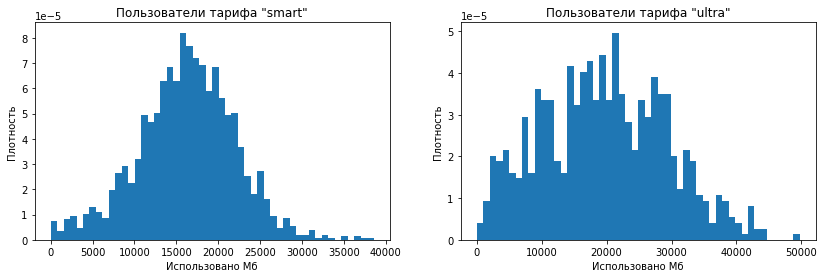

In [15]:
#Графики по интернету
fig,ax = plt.subplots(1,2)

ax[0].hist(smart_users['mb_used'],density=True,bins=50)
ax[1].hist(ultra_users['mb_used'],density=True,bins=50)

ax[0].set_title('Пользователи тарифа "smart"')
ax[1].set_title('Пользователи тарифа "ultra"')
ax[0].set_xlabel('Использовано Мб')
ax[1].set_xlabel('Использовано Мб')
ax[0].set_ylabel('Плотность')
ax[1].set_ylabel('Плотность')
fig.set_size_inches(14,4)

plt.show()

Оба графика явна напоминают нормальное распределение. Отличие их в том, что для пользователей тарифа "smart" большая часть значений сосредоточена по центру и достаточно быстро плотность падает по бокам, в то время как у пользователей тарифа "ultra" видна несимметричность в левую сторону. Конечно, для них тоже характерно, что большая часть сосредоточена в центре, однако есть выразительные пики с обеих сторон, а особенно слева. Это говорит о том, что все таки немалое количество пользователей сильно недоиспользуют данный им трафик.

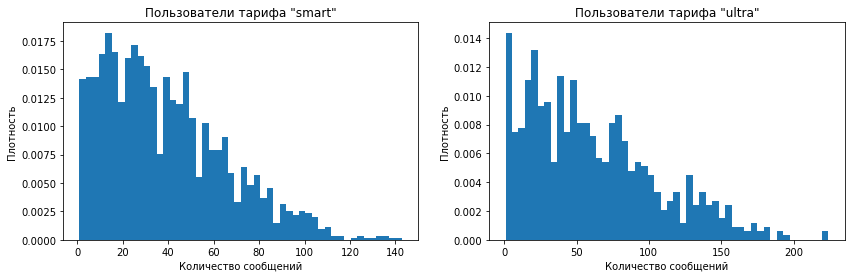

In [16]:
#Графики по сообщениям
fig,ax = plt.subplots(1,2)

ax[0].hist(smart_users['number_of_messages'],density=True,bins=50)
ax[1].hist(ultra_users['number_of_messages'],density=True,bins=50)

ax[0].set_title('Пользователи тарифа "smart"')
ax[1].set_title('Пользователи тарифа "ultra"')
ax[0].set_xlabel('Количество сообщений')
ax[1].set_xlabel('Количество сообщений')
ax[0].set_ylabel('Плотность')
ax[1].set_ylabel('Плотность')
fig.set_size_inches(14,4)

plt.show()

Данные графики больше напоминают распределение Пуассона, особенно для пользователей тарифа "smart". Большая часть значений сосредоточена на небольших числах и здесь также заметно, что лишь в  пользователях тарифа "smart" присутствуют те, которые перерасходуют сообщения. А пользователи тарифа "ultra" наоборот, практически не используют данные им возможности. Вероятно, они используют мессенджеры и отправляют сообщения за счет интернета.

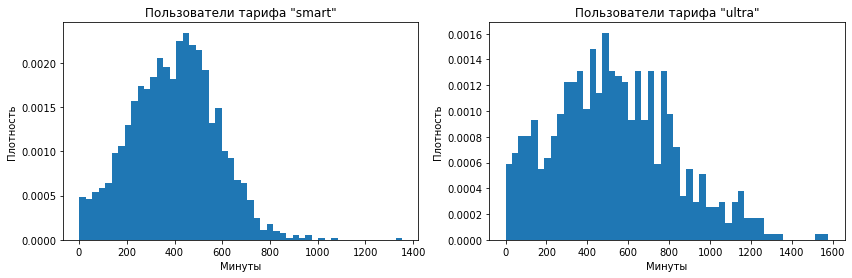

In [17]:
#Графики по звонкам
fig,ax = plt.subplots(1,2)

ax[0].hist(smart_users['total_duration'],density=True,bins=50)
ax[1].hist(ultra_users['total_duration'],density=True,bins=50)

ax[0].set_title('Пользователи тарифа "smart"')
ax[1].set_title('Пользователи тарифа "ultra"')
ax[0].set_xlabel('Минуты')
ax[1].set_xlabel('Минуты')
ax[0].set_ylabel('Плотность')
ax[1].set_ylabel('Плотность')
fig.set_size_inches(14,4)

plt.show()

Данные распределения также напоминают нормальное, однако с некоторой скошенностью влево. В обоих случаях виднеется всплеск в районе 0. Вероятно, это связано с тем, что многие пользователи обоих тарифов используют мессенджеры для звонков и соответственно они происходят за счет интернета. Тогда отсюда напрашивается вывод, что пользователи тарифа "smart" в какой-то момент расходуют весь данный им трафик и начинают использовать данные им сообщения и минуты, которые они также нередко превышают. В то время, как пользователям тарифа "ultra" практически всегда хватает интернета и потому такая разница между данными им звонками и сообщениями и тем, что они тратят. Похоже все крутится вокруг интернета. 

Заметка.

При слиянии трех таблиц мы потеряли данные о некоторых пользователях. Изначально в таблице по звонкам и интернету хранилось данных о большем числе пользователей (примерно на 70). Видимо о некоторых пользователях есть данные по интернету и звонкам, но нет по сообщениям. Тем не менее, после построения распределений исключительно по таблице интернета было выяснено, что распределения для двух тарифов не изменилось. Следовательно их потеря не повлияла на результат анализа.

Распределения по всем пользователям в звонках и интернету приведены ниже.

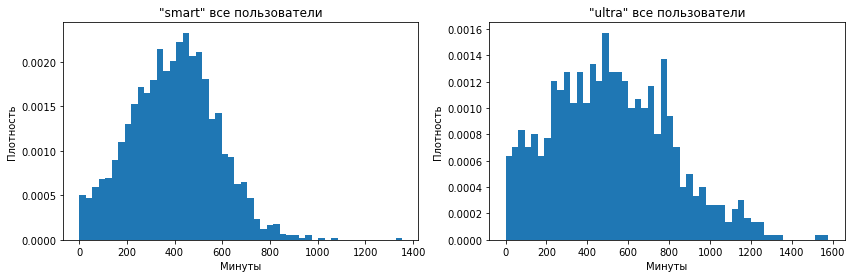

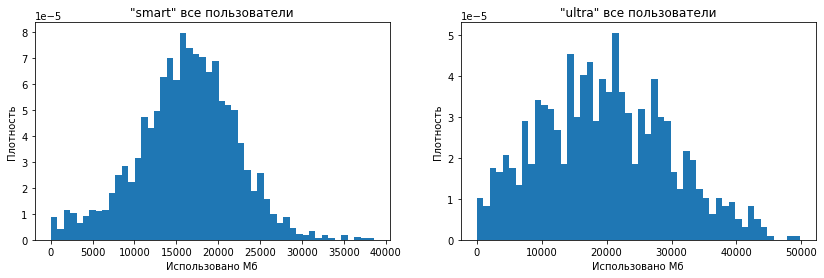

In [18]:
#Создадим отдельные объединения таблиц и выделим из них пользователей по тарифам
calls_test = pd.merge(calls_per_mon,users,right_index=True,left_index=True)
calls_test_smart = calls_test.query('tariff == "smart"')
calls_test_ultra = calls_test.query('tariff == "ultra"')

traff_test = pd.merge(traff_per_month,users,right_index=True,left_index=True)
traff_test_smart = traff_test.query('tariff == "smart"')
traff_test_ultra = traff_test.query('tariff == "ultra"')

fig,ax = plt.subplots(1,2)

ax[0].hist(calls_test_smart['total_duration'],density=True,bins=50)
ax[1].hist(calls_test_ultra['total_duration'],density=True,bins=50)

ax[0].set_title('"smart" все пользователи')
ax[1].set_title('"ultra" все пользователи')
ax[0].set_xlabel('Минуты')
ax[1].set_xlabel('Минуты')
ax[0].set_ylabel('Плотность')
ax[1].set_ylabel('Плотность')
fig.set_size_inches(14,4)

plt.show()

fig,ax = plt.subplots(1,2)

ax[0].hist(traff_test_smart['mb_used'],density=True,bins=50)
ax[1].hist(traff_test_ultra['mb_used'],density=True,bins=50)

ax[0].set_title('"smart" все пользователи')
ax[1].set_title('"ultra" все пользователи')
ax[0].set_xlabel('Использовано Мб')
ax[1].set_xlabel('Использовано Мб')
ax[0].set_ylabel('Плотность')
ax[1].set_ylabel('Плотность')
fig.set_size_inches(14,4)

plt.show()

Как видно, распределения мало отличаются от тех, где мы объединяли все 3 таблицы. Следовательно потеря 70 пользователей не привела к ошибочным выводам.

## Шаг 4. Проверьте гипотезы

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Нулевая гипотеза: средняя выручка равна.

Альтернативная гипотеза: средняя выручка __не__ равна.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [19]:
from scipy import stats as st

smart_income = smart_users['payment']
ultra_income = ultra_users['payment']

#Задаем уровень значимости
alpha = .05

results = st.ttest_ind(smart_income,ultra_income)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 7.62608553715299e-151
Отвергаем нулевую гипотезу


Полученное значение говорит о том, что хоть и средняя выручка по различным тарифам отличается, маловероятно получить такую разницу случайно. Следовательно мы отвергаем нулевую гипотезу и предполагаем, что средние выручки отличаются.

Теперь проверим следующую гипотезу: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза: средняя выручка равна.

Альтернативная гипотеза: средняя выручка __не__ равна.

In [20]:
#Извлекли данные
moscow_users = final_merge.query('city == "Москва"')['payment']
other_users = final_merge.query('city != "Москва"')['payment']

#Задаем уровень значимости
alpha = .05

results = st.ttest_ind(moscow_users,other_users)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0600145845376986
Не получилось отвергнуть нулевую гипотезу


Полученное значение говорит о том, что с вероятностью 6% разница в доходе получается слчучайно. Потому мы не отвергаем нулевую гипотезу и предполагаем, что чеки равны. Видимо пользователи других регионов берут количеством.

## Шаг 5. Напишите общий вывод

В результате анализа было выявлено, что пользователи тарифа "smart" более склонны к чрезмерному использованию данного им ресурса и потому более склонны к переплате. Эта переплата в первую очередь сконцентрирована на интернет трафике. Было получено, что пользователи в среднем превышают данный им тариф. Хотя есть и пользователи, что умудряются и превышать свой план и по сообщениям и по звонкам. Вероятно, это связано с тем, что интернет в какой-то момент заканчивается и пользователи не могут больше пользоваться мессенджерами и вынуждены тратить выделенные им минуты.

Пользователи тарифа "ultra" уже менее склонны к перерасхоу их плана. В среднем им хватает выделенного интернет трафика, чтобы даже не задействовать доступные им звонки и сообщения. По последним нет никого, кто бы перешел грань в использовании сообщений или звонков и эта граница еще очень далеко.

Также было выявлено, что средний чек пользователей разных тарифов отличаются. По выборке счет больше у пользователей тарифа "ultra". Несмотря на то, что они менее склонны к превышению своего плана, сама базовая цена очень велика. Учитывая то, что в конечном итоге все крутится вокруг интернета, то данные пользователи явно переплачивают.

И, наконец, выяснили, что средний чек между пользователями разных регионов не отличается. Количество пользователей из Москвы значительно меньше, чем из других регионов, но видимо именно москвичи склонны к тарифу "ultra" и большей переплате, а пользователи из регионов более экономны.